In [2]:
# BST
from graphviz import Digraph

def visualize_tree(tree):
    if tree is None:
        return "Nothing in the tree!"
    def add_nodes_edges(tree, dot=None):
        if dot is None:
            dot = Digraph()
            dot.attr('node', shape='circle')
            dot.node(name=str(tree), label=str(tree.value))
            
        for child in [tree.left, tree.right]:
            if child is not None:
                if child == tree.left:
                    dot.attr('node', shape='circle', style='filled', fillcolor='lightblue')
                if child == tree.right:
                    dot.attr('node', shape='doublecircle', style='filled', fillcolor='seashell')
                dot.node(name=str(child), label=str(child.value))    
                dot.edge(str(tree), str(child))
                dot = add_nodes_edges(child, dot=dot)
        return dot
    
    dot = add_nodes_edges(tree)
    
    display(dot)

In [7]:
class TreeNode:
    def __init__(self, x):
        self.value = x
        self.left = None
        self.right = None


class BST(TreeNode):
    def __init__(self, value, parent=None):
        super().__init__(value)
        self.parent = parent
        
    def insert(self, val):
        if val < self.value:   #for left side
            if self.left is None:
                self.left = BST(val, self)
            else:
                self.left.insert(val)
        
        else:
            if self.right is None:
                self.right = BST(val, self)
            else:
                self.right.insert(val)       
            
                
    def dfs_search_recursive(self, val_to_search):
        left_found, right_found = False, False
        nodes_visited = 1
#         print(self.value)
        if self.value is val_to_search:
            return True,nodes_visited
        
        if self.left:
            left_found, left_nodes_visited = self.left.dfs_search_recursive(val_to_search)
            nodes_visited = nodes_visited + left_nodes_visited               
            
        if self.right:
            right_found, right_nodes_visited = self.right.dfs_search_recursive(val_to_search)
            nodes_visited = nodes_visited + right_nodes_visited
            
        if left_found or right_found is True:
            return True, nodes_visited
        
        return False, nodes_visited
            
        
    
    def dfs_search_iterative(self, val_to_search):
        stack = [self]
        nodes_visited = 0
        
        while len(stack) != 0:
            current = stack.pop()   # LIFO
            nodes_visited += 1
            
            if current is None:    # As this logic also pushes Nones of leaf childs to stack too so nodes_visited would be more
                continue
            
#             print(current.value)
            if current.value is val_to_search:
                return True,nodes_visited  
            
            stack.append(current.left)   
            stack.append(current.right)
        
        return False, nodes_visited  # As whole tree has been searched and True has not been returned so the search value is not in it, could be improved by not adding Nones to stack
    
    
    def bfs_search(self, val_to_search):
        queue = [self]
        nodes_visited = 0
        
        while len(queue) != 0:
            current = queue.pop(0)  # FIFO
            nodes_visited += 1
            
            if current is None:   # As this logic of dfs also appends None of leaf childs so nodes_visited would be more, could be improved by not adding Nones to queue
                continue
                
#             print(current.value)
            if current.value is val_to_search:
                return True, nodes_visited
            
            queue.append(current.left)    
            queue.append(current.right)
        
        return False, nodes_visited

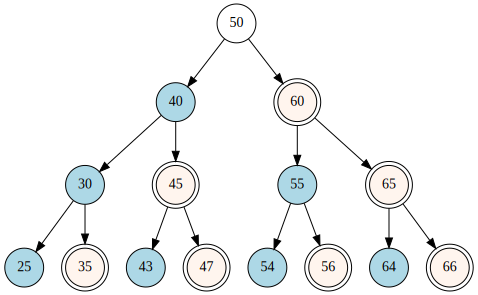

In [8]:
b1 = BST(50)

b1.insert(40)
b1.insert(30)
b1.insert(45)
b1.insert(25)
b1.insert(35)
b1.insert(43)
b1.insert(47)
b1.insert(60)
b1.insert(55)
b1.insert(54)
b1.insert(56)
b1.insert(65)
b1.insert(64)
b1.insert(66)

visualize_tree(b1)

In [9]:
print(b1.dfs_search_iterative(25))
print(b1.dfs_search_iterative(100))

(True, 29)
(False, 31)


In [10]:
print(b1.dfs_search_recursive(25))
print(b1.dfs_search_recursive(100))

(True, 15)
(False, 15)


In [11]:
print(b1.bfs_search(25))
print(b1.bfs_search(100))

(True, 15)
(False, 31)
